# Quantum SVM

## Importing

In [1]:
%matplotlib inline
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Logging
#import logging
#logging.basicConfig(level=logging.INFO)

## Loading Iris Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# this is the iris loading part edited from the tutorial to return correct data structure. 
# The part reducing dimension with PCA is commented out. 
# Creation of test set is modified to allow test set size larger than 1. 
# train_size: integer, train set size per type of sample
# testi_size: integer, test set size per type of sample
# If there's not enough sample, this method will return all available samples in the dataset.
# all data are standardized for gaussian around 0 with unit variance and scaled to range (-1, +1).

def Iris(train_size, test_size, PLOT_DATA=True, random_seed=666):
    if train_size > 150 or test_size > 150:
        raise Exception('Training or testing set shouldn\'t be larger than the size of IRIS, which is 150.')
    
    class_labels = [r'A', r'B', r'C']
    data, target = load_iris(True)
    test_ratio = float(test_size)/float(train_size + test_size)
    sample_train, sample_test, label_train, label_test = train_test_split(data, target, test_size=test_ratio, random_state=random_seed)

    # Now reduce number of features to number of qubits
    # pca = PCA(n_components=n).fit(sample_train)
    # sample_train = pca.transform(sample_train)
    # sample_test = pca.transform(sample_test)

    
    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)
    
    # Scale to the range (-1,+1)
    minmax_scale = MinMaxScaler((-1, 1)).fit(sample_train)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)

    # Pick training size number of samples from each distro
    train_set = {key: (sample_train[label_train == k, :])[:train_size] for k, key in enumerate(class_labels)}
    test_set = {key: (sample_test[label_test == k, :])[:test_size] for k, key in enumerate(class_labels)}

    if PLOT_DATA:
        for k in range(0, 3):
            plt.scatter(sample_train[label_train == k, 0][:train_size],
                        sample_train[label_train == k, 1][:train_size])

        plt.title("train set")
        plt.show()
        
        for k in range(0, 3):
            plt.scatter(sample_test[label_test == k, 0][:test_size],
                        sample_test[label_test == k, 1][:test_size])

        plt.title("test set")
        plt.show()

    return train_set, test_set

## QSVM

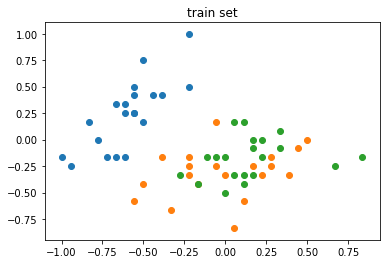

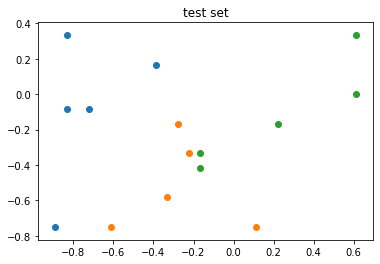

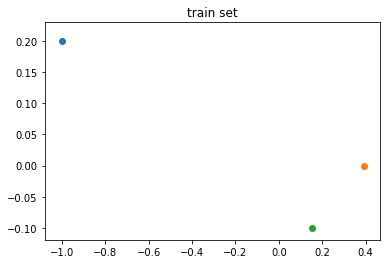

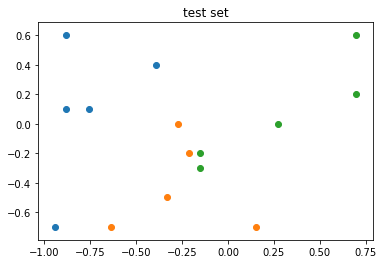

In [4]:
from qiskit.aqua.components.feature_maps import SecondOrderExpansion, FirstOrderExpansion, PauliExpansion, self_product
#from qiskit.aqua.components.multiclass_extensions import AllPairs

feature_dim = 4 # Iris contains 4 features: sepal length, sepal width, petal length, petal width
feature_map_depth = 2 # circuit depth of feature map

# Linear entanglement means nearest neighbour entanglement

# Making a list of feature maps to test in combination with all multiclass extensions


# Creating train and test sets
train_set, test_set = Iris(20,5)
extra_train_set, extra_test_set = Iris(1,5)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_set)




# making a list of qsvms using different multiclass extensions and feature maps               
#qsvms = []
#for f in range(0, len(feature_maps)):

#    *** NOTE ***
# Apparently, the __init__.py for multiclass extensions does not include the name of
# any of the three available classes: OneAgainstRest, ErrorCorrectingCode and AllPairs.
# It's impossible to import any of them from the library.
# I have tried reinstalled the package with pip install qiskit -e (experimental mode)
# and edited my qiskit\aqua\components\multiclass_extensions\__init__.py to make extension 
# objects work. It takes too much time so I'll just switch to jsons from now on. 
#
#    __all__ = ['MulticlassExtension',
#*add line  'OneAgainstRest'
#*add line  'ErrorCorrectingCode'
#*add line  'AllPairs'
#           'Estimator']
    
#    one_against_rest = OneAgainstRest() 

# Also, it seems that when using declarative approach for multiclass, parameters on backend and
# feature map are not allowed, and I have commented out related sections specifying them. 
# I'll try to figure out why.

temp = [test_set[k] for k in test_set]
total_array = np.concatenate(temp)

"""
aqua_dict = {
    'problem': {'name': 'classification'},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.Aer', 'name': 'qasm_simulator', 'shots': 1024},
    'multiclass_extension': {'name': 'OneAgainstRest'},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}

algo_input = ClassificationInput(train_set, test_set, total_array)

extensions = [
   {'name': 'OneAgainstRest'},
   {'name': 'AllPairs'}, 
   {'name': 'ErrorCorrectingCode', 'code_size': 5}
]

feature_maps = [
    {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'full'},
    {'name': 'FirstOrderExpansion', 'depth': 2}
]


for extension in extensions:
    for feature_map in feature_maps:
        aqua_dict['multiclass_extension'] = extension
        aqua_dict['feature_map'] = feature_map
        result = run_algorithm(aqua_dict, algo_input)
        print("\n----- Using multiclass extension: '{}' -----\n".format(extension['name']))
        print("\n----- Using feature map: '{}' -----\n".format(feature_map['name']))
        for k,v in result.items():
            print("'{}' : {}".format(k, v))
"""
None


# Displaying Kernel Circuit

The following code creates `QiskitAqua` instance and retrieve a quantum circuit used to calculate kernel function for some inputs.
I think the image of the kernel circuit worth including in the slides ('Hey, this is the kernel function we used').

Due to the limited entangler_map, IZIZ is skipped.
Due to the limited entangler_map, ZIIZ is skipped.
Due to the limited entangler_map, ZIZI is skipped.


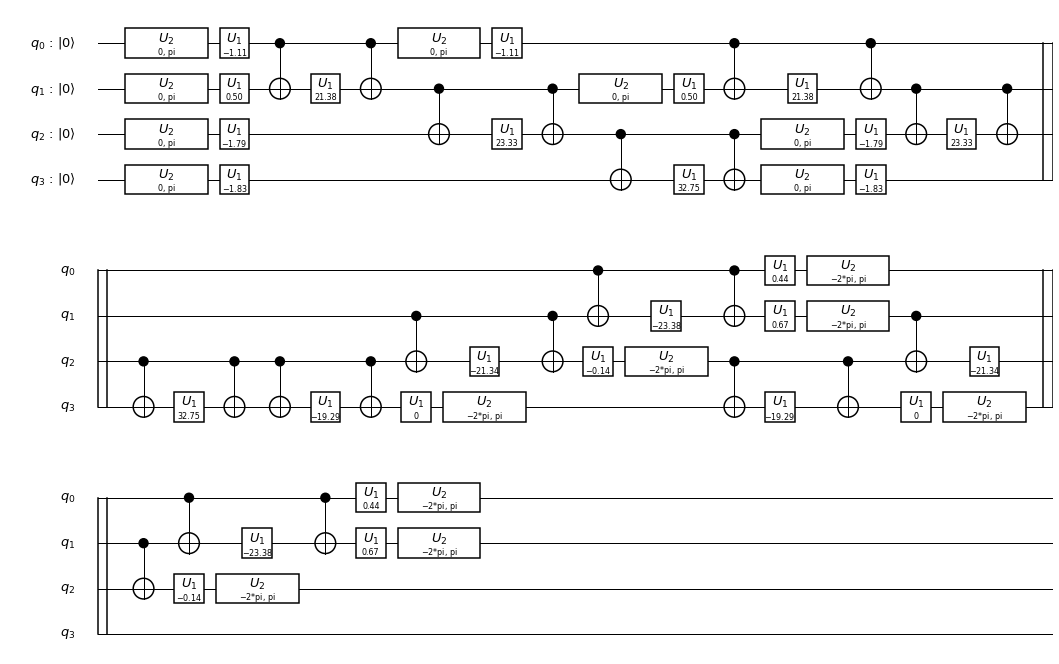

In [5]:
from qiskit.aqua import QiskitAqua

# define the problem dictionary
aqua_dict = {
    'problem': {'name': 'classification'},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.Aer', 'name': 'qasm_simulator', 'shots': 1024},
    'multiclass_extension': {'name': 'OneAgainstRest'},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
# generate the classification input
# (originally, train_data and test_data are used here but not defined in the notebook.
# I guess the variables were renamed and these are a leftover.)
algo_input = ClassificationInput(train_set, test_set, total_array)

# create QiskitAqua instance
aqua = QiskitAqua(aqua_dict, algo_input)

# we can run the algorithm by:
# aqua.run()
# but no need to run for just creating a circuit image

# construct a circuit for computing the kernel function of two random inputs
circ = aqua.quantum_algorithm.construct_circuit(np.array(train_set['A'][0]), np.array(train_set['B'][0]))

# The circuit contains unused classical registers, so we remove them for cleaner output image
circ.cregs.clear()

circ.draw(output='mpl', filename='kernel.png')

# The circuit is broken up into three parts. I couldn't find how to prevent it...